In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
DATA_PATH = "/content/drive/MyDrive/Hacking-txt-Files" # The directory to look in for all the text files to be analyzed.

#The names (and locations) of the csv files that will be created:
WORD_FREQUENCY_CSV_FILENAME = "Frequencies.csv"
INVERSE_DOCUMENT_FREQUENCY_CSV_FILENAME = "InverseDocumentFrequencies.csv"
TF_IDF_CSV_FILENAME = "tfidf.csv"

In [43]:
import os

textdirs = os.listdir(DATA_PATH) # returns list
texts = []

#Loop over all of the files in the provided directory
for file in textdirs:

    #Ensure that only text files are included:
    if file.endswith(".txt"):
        text_dir = os.path.join(DATA_PATH, file)
        texts.append(text_dir)

In [44]:
print(texts)

['/content/drive/MyDrive/Hacking-txt-Files/397-Hacking-en-22e299e3cc853e9b7758da05c47080c1d7396ca8527ad15df932e3cffed9b14f.txt', '/content/drive/MyDrive/Hacking-txt-Files/427-Hacking-en-1aac2f8c1df739c2e8161a202e5b42dde1448c70c58a97916b0093c6d0a9c80d.txt', '/content/drive/MyDrive/Hacking-txt-Files/380-Hacking-en-b9901dafdf760905cd95299a368f4116f9ad1a83f37e6b2252360b593d200348.txt', '/content/drive/MyDrive/Hacking-txt-Files/432-Hacking-en-1806ca367e364a2f87363adda381344000afe2194ea24b641854ef493008299e.txt', '/content/drive/MyDrive/Hacking-txt-Files/416-Hacking-en-e52d6af5d6a95d91c848740568d388133368beb36d138a99218ad87fade9f948.txt', '/content/drive/MyDrive/Hacking-txt-Files/448-Hacking-en-db02eda4e8484e6f374932ff95538504adfe70cd6f27b07d285648fe7da7e6d9.txt', '/content/drive/MyDrive/Hacking-txt-Files/333-Hacking-en-7ca002e3e3faa7c56578e620c7b5bf1a84f81351156a9c1e726d364eaf2b0d6d.txt', '/content/drive/MyDrive/Hacking-txt-Files/281-Hacking-en-e57d1abfdd6b0683197e5d56a5777e44eabd5ca7b74910

In [45]:
import csv
import string
import re
import pandas as pd
from collections import defaultdict


num_lines = 0
num_words = 0
num_chars = 0

counts = defaultdict(int)
docs = {}

for text in texts:
    with open(text, 'r', encoding="utf-8") as f:
        for line in f:
            # Use Regex to remove punctuation and isolate words
            words = re.findall(r'\b\w[\w-]*\b', line.lower())
            for word in words:
                counts[word] += 1
            num_lines += 1
            num_words += len(words)
            num_chars += len(line)

    relativefreqs = {}
    for word, rawCount in counts.items():
        #relativefreqs[word] = rawCount #/ num_words
        # gather only words with alphabetical characters, discard ones with numbers
        if word.isalpha():
            relativefreqs[word] = rawCount / num_words
        counts[word] = 0
    # add this document's relative freqs to our dictionary
    docs[os.path.basename(text)] = relativefreqs

#output everything to a .csv file, using pandas as a go between.
df = pd.DataFrame(docs)
df = df.fillna(0)
df.to_csv(WORD_FREQUENCY_CSV_FILENAME, encoding="utf-8") # write out to CSV
print("Done.")

Done.


In [46]:
import csv
import math
import pandas as pd

idf = {}

with open(WORD_FREQUENCY_CSV_FILENAME, encoding="utf-8", newline='') as csvfile:
    wordsreader = csv.reader(csvfile, delimiter=',', quotechar='"')

    #skip header information
    total_documents = len(next(wordsreader, None)) - 1
    for row in wordsreader:
        docsContainingWord = 0
        iterrow = iter(row)
        next(iterrow)
        for entry in iterrow:
            if (entry != '0.0') and (entry != '0'):
                docsContainingWord += 1
        idf[row[0]] = math.log(total_documents / (1 + docsContainingWord))

df = pd.DataFrame(idf, index=['Inverse Document Frequency'])
df2 = df.transpose()
df2.to_csv(INVERSE_DOCUMENT_FREQUENCY_CSV_FILENAME, encoding="utf-8")
print("Done.")

Done.


In [47]:
import csv

file1reader = csv.reader(open(WORD_FREQUENCY_CSV_FILENAME, encoding="utf-8"), delimiter=",")
file2reader = csv.reader(open(INVERSE_DOCUMENT_FREQUENCY_CSV_FILENAME, encoding="utf-8"), delimiter=",")

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

#skip headers
header1 = next(file1reader) #header
header2 = next(file2reader) #header
with open(TF_IDF_CSV_FILENAME, 'w', encoding="utf-8", newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(header1)
    for row1, row2 in zip(file1reader, file2reader):
        rowOut = []
        iterrow1 = iter(row1)
        rowOut.append(next(iterrow1))
        for entry in iterrow1:
            entry = float(entry) * float(row2[1])
            rowOut.append(entry)
        writer.writerow(rowOut)

print("Done.")

Done.


In [48]:
df = pd.read_csv(TF_IDF_CSV_FILENAME, encoding="utf-8", index_col=0) # read in the CSV
df.rename(columns={'Unnamed: 0': 'Text'}, inplace=True) # add a label to the first column
df = df.fillna(0) # replace NaNs with zeroes.
df.head(10)

,397-Hacking-en-22e299e3cc853e9b7758da05c47080c1d7396ca8527ad15df932e3cffed9b14f.txt,427-Hacking-en-1aac2f8c1df739c2e8161a202e5b42dde1448c70c58a97916b0093c6d0a9c80d.txt,380-Hacking-en-b9901dafdf760905cd95299a368f4116f9ad1a83f37e6b2252360b593d200348.txt,432-Hacking-en-1806ca367e364a2f87363adda381344000afe2194ea24b641854ef493008299e.txt,416-Hacking-en-e52d6af5d6a95d91c848740568d388133368beb36d138a99218ad87fade9f948.txt,448-Hacking-en-db02eda4e8484e6f374932ff95538504adfe70cd6f27b07d285648fe7da7e6d9.txt,333-Hacking-en-7ca002e3e3faa7c56578e620c7b5bf1a84f81351156a9c1e726d364eaf2b0d6d.txt,281-Hacking-en-e57d1abfdd6b0683197e5d56a5777e44eabd5ca7b74910134505e166242a1f32.txt,278-Hacking-en-c0205b0b14ae65f68c7b525e521b9fb2a0b569a0c7cb10be649621a319fc4332.txt,276-Hacking-en-e487ce46651a5e5b31c84d5e9c387d23cc81eefe93dca19249481d7a7763ecbd.txt,...,677-Hacking-en-0af026fe57f1f02f0a0759a318ea0a9187abb108a651e3f56acb55bf59a7240e.txt,595-Hacking-en-6071d2bff5bb95b06b4706a7cecd0253732012648fcc06d3b8383f73cb9c5788.txt,718-Hacking-en-c0d99bd9510440649b2be41b9a936ebb79b19f7c660767c8b1effd03a99ad769.txt,1099-Hacking-en-80057633c1e550f9b9fe9dbe271e05a3b4786a0bca62c9bd143a20f6be4e0a32.txt,669-Hacking-en-243f98e6bc187c1d83231c6ad99940fbe41f22c2420996b975d90881a8791474.txt,762-Hacking-en-236aa4c9a04697088e32fdee6742974ba265441a8a6382a45dac3e49a82d1f20.txt,617-Hacking-en-99e2c847f336b5f45102e803d2d591f03c9595efdc66b983bf977546f9f2d83d.txt,479-Hacking-en-484c575d0ec7cac4ca5d1463b5c214af63e14d8674bb1dbfa8c39f45eb1fdd97.txt,538-Hacking-en-62b0a2b4299456cf9385f69ddefafc2196448c87535160cdbca7a93ad6dc895a.txt,532-Hacking-en-7533f91da92a284a4485f7f72de387edc4500c8e9e7cd9cea82fe62ad4b69bd3.txt
vortex,0.046232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
hackers,0.012209,0.000572,0.000000,0.000000,0.000000,0.000000,0.003167,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000015,0.000004
quick,0.006198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
solutions,0.002549,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
to,0.007528,0.003999,0.000320,0.000000,0.001150,0.000000,0.002224,0.000629,0.0,0.000093,...,0.000017,0.0,7.610599e-07,0.000020,0.000000e+00,7.587908e-07,0.000002,0.000007,0.000006,0.000008
your,0.004417,0.000223,0.000202,0.000000,0.000934,0.000151,0.003187,0.000092,0.0,0.000000,...,0.000042,0.0,7.212457e-06,0.000007,0.000000e+00,0.000000e+00,0.000000,0.000001,0.000004,0.000014
financial,0.002238,0.001468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000e+00,0.000009,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
needs,0.002066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000e+00,0.000009,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000009
skip,0.001674,0.000000,0.000000,0.000000,0.000000,0.000000,0.001013,0.000452,0.0,0.000000,...,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
the,0.006274,0.001647,0.001282,0.000103,0.002382,0.000080,0.001519,0.000677,0.0,0.000047,...,0.000011,0.0,7.610599e-07,0.000012,7.588451e-07,7.587908e-07,0.000002,0.000002,0.000011,0.000007


In [49]:
df2 = df.transpose()
df2.head(20)

,vortex,hackers,quick,solutions,to,your,financial,needs,skip,the,...,snd,paradise,babuk,auth,anubis,cryptowallets,megacourse,validator,ipbin,cream
397-Hacking-en-22e299e3cc853e9b7758da05c47080c1d7396ca8527ad15df932e3cffed9b14f.txt,0.046232,0.012209,0.006198,0.002549,0.007528,0.004417,0.002238,0.002066,0.001674,0.006274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427-Hacking-en-1aac2f8c1df739c2e8161a202e5b42dde1448c70c58a97916b0093c6d0a9c80d.txt,0.000000,0.000572,0.000000,0.000000,0.003999,0.000223,0.001468,0.000000,0.000000,0.001647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380-Hacking-en-b9901dafdf760905cd95299a368f4116f9ad1a83f37e6b2252360b593d200348.txt,0.000000,0.000000,0.000000,0.000000,0.000320,0.000202,0.000000,0.000000,0.000000,0.001282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432-Hacking-en-1806ca367e364a2f87363adda381344000afe2194ea24b641854ef493008299e.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416-Hacking-en-e52d6af5d6a95d91c848740568d388133368beb36d138a99218ad87fade9f948.txt,0.000000,0.000000,0.000000,0.000000,0.001150,0.000934,0.000000,0.000000,0.000000,0.002382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448-Hacking-en-db02eda4e8484e6f374932ff95538504adfe70cd6f27b07d285648fe7da7e6d9.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000151,0.000000,0.000000,0.000000,0.000080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333-Hacking-en-7ca002e3e3faa7c56578e620c7b5bf1a84f81351156a9c1e726d364eaf2b0d6d.txt,0.000000,0.003167,0.000000,0.000000,0.002224,0.003187,0.000000,0.000000,0.001013,0.001519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281-Hacking-en-e57d1abfdd6b0683197e5d56a5777e44eabd5ca7b74910134505e166242a1f32.txt,0.000000,0.000000,0.000000,0.000000,0.000629,0.000092,0.000000,0.000000,0.000452,0.000677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278-Hacking-en-c0205b0b14ae65f68c7b525e521b9fb2a0b569a0c7cb10be649621a319fc4332.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276-Hacking-en-e487ce46651a5e5b31c84d5e9c387d23cc81eefe93dca19249481d7a7763ecbd.txt,0.000000,0.000000,0.000000,0.000000,0.000093,0.000000,0.000000,0.000000,0.000000,0.000047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1600x1600 with 0 Axes>

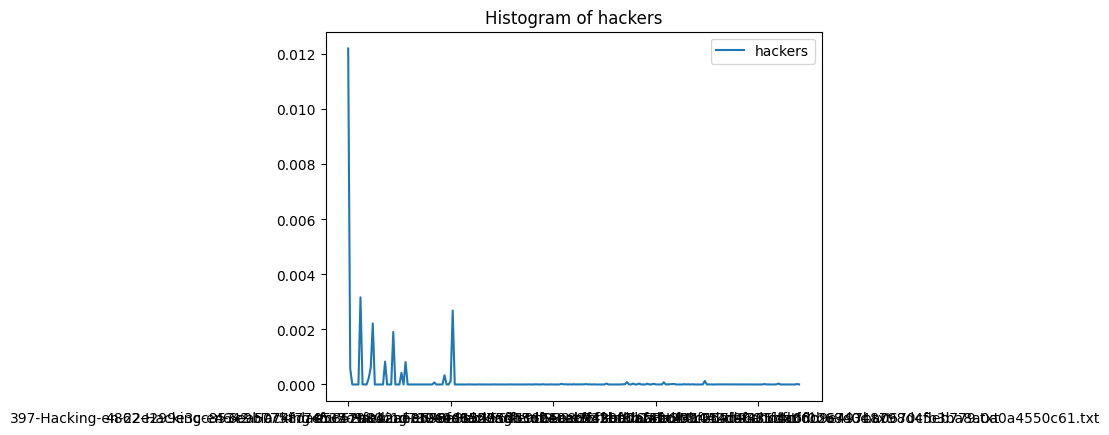

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word2Plot = "hackers" # change this to see different words

plt.figure(figsize=(16, 16))
# plt.rcParams.update({'font.size': 12})
df2[[word2Plot]].plot()
plt.title('Histogram of ' + word2Plot)
plt.show()